In [2]:
import numpy as np
np.random.seed(1234)

- 데이터 로딩

In [3]:
from tensorflow.keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

2023-02-04 15:11:02.909113: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-04 15:11:03.846960: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-04 15:11:03.847248: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-04 15:11:05.909362: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

57026/57026 [==============================] - 0s 0us/step


In [4]:
x_train[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [5]:
y_train[0]

15.2

- 데이터 정규화

In [6]:
train_mean = x_train.mean(axis=0)
x_train -= train_mean
train_std = x_train.std(axis=0)
x_train /= train_std

x_test -= train_mean
x_test /= train_std
x_train[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

- 모델 정의

In [7]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense

In [8]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


2023-02-04 15:11:23.983688: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:967] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-02-04 15:11:23.984019: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-04 15:11:23.984216: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-02-04 15:11:23.984349: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-02-04 15:11:23.984429: W tensorf

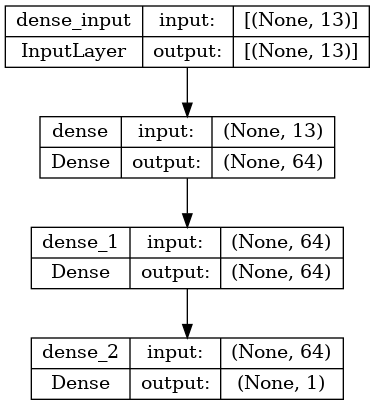

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

- 컴파일을 포함한 모델 생성 함수 정의 및 훈련

In [10]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(x_train, y_train, epochs = 500, batch_size=16, validation_data=(x_test,y_test))

Epoch 1/500
26/26 [==============================] - 1s 10ms/step - loss: 508.9404 - mae: 20.5291 - val_loss: 441.6230 - val_mae: 18.9357
Epoch 2/500
26/26 [==============================] - 0s 5ms/step - loss: 336.7102 - mae: 16.0394 - val_loss: 241.8976 - val_mae: 13.3593
Epoch 3/500
26/26 [==============================] - 0s 8ms/step - loss: 161.6822 - mae: 10.2878 - val_loss: 101.9924 - val_mae: 8.1830
Epoch 4/500
26/26 [==============================] - 0s 6ms/step - loss: 72.5725 - mae: 6.4996 - val_loss: 52.7327 - val_mae: 5.7905
Epoch 5/500
26/26 [==============================] - 0s 7ms/step - loss: 42.5056 - mae: 4.9025 - val_loss: 33.9354 - val_mae: 4.7689
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 29.7640 - mae: 4.0551 - val_loss: 26.2246 - val_mae: 4.1386
Epoch 7/500
26/26 [==============================] - 0s 8ms/step - loss: 24.7553 - mae: 3.5708 - val_loss: 25.7567 - val_mae: 3.9590
Epoch 8/500
26/26 [==============================] - 0s 4

In [11]:
model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


array([[ 8.9214525],
       [19.28697  ],
       [21.690168 ],
       [32.607193 ],
       [24.685085 ],
       [24.281319 ],
       [30.006678 ],
       [22.21935  ],
       [19.1878   ],
       [21.081    ],
       [23.248909 ],
       [18.616762 ],
       [16.483713 ],
       [45.443634 ],
       [20.296804 ],
       [22.888872 ],
       [25.208637 ],
       [19.741179 ],
       [21.168179 ],
       [22.15103  ],
       [12.652157 ],
       [ 8.823112 ],
       [21.663656 ],
       [18.57201  ],
       [19.690361 ],
       [24.136524 ],
       [27.998709 ],
       [32.467476 ],
       [11.72684  ],
       [20.182098 ],
       [20.352953 ],
       [14.085918 ],
       [33.302124 ],
       [24.516066 ],
       [20.581196 ],
       [ 9.680507 ],
       [18.032751 ],
       [18.985054 ],
       [21.045816 ],
       [27.781282 ],
       [30.785933 ],
       [26.25641  ],
       [13.9896755],
       [45.735226 ],
       [30.269312 ],
       [31.507757 ],
       [30.252909 ],
       [20.92

- 시각화

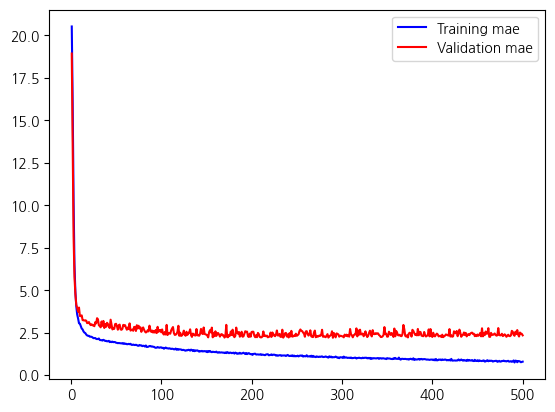

In [12]:
import matplotlib.pyplot as plt

train_mae = history.history['mae']
val_mae = history.history['val_mae']
epochs = range(1, len(train_mae)+1)

plt.plot(epochs, train_mae, 'blue', label='Training mae')
plt.plot(epochs, val_mae, 'red', label='Validation mae')
plt.legend();